In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/MyDrive/apple_quality.csv', low_memory=False)


In [8]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [ ]:
X = df.drop('Quality', axis=1)
y = df['Quality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

In [ ]:
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

In [ ]:
results_df = pd.DataFrame(results).T
print(results_df)


                        Accuracy  Precision    Recall  F1 Score
Logistic Regression     0.751667   0.751644  0.751594  0.751611
Decision Tree           0.786667   0.786774  0.786774  0.786667
Random Forest           0.890833   0.890812  0.890848  0.890824
Support Vector Machine  0.886667   0.886658  0.886710  0.886662


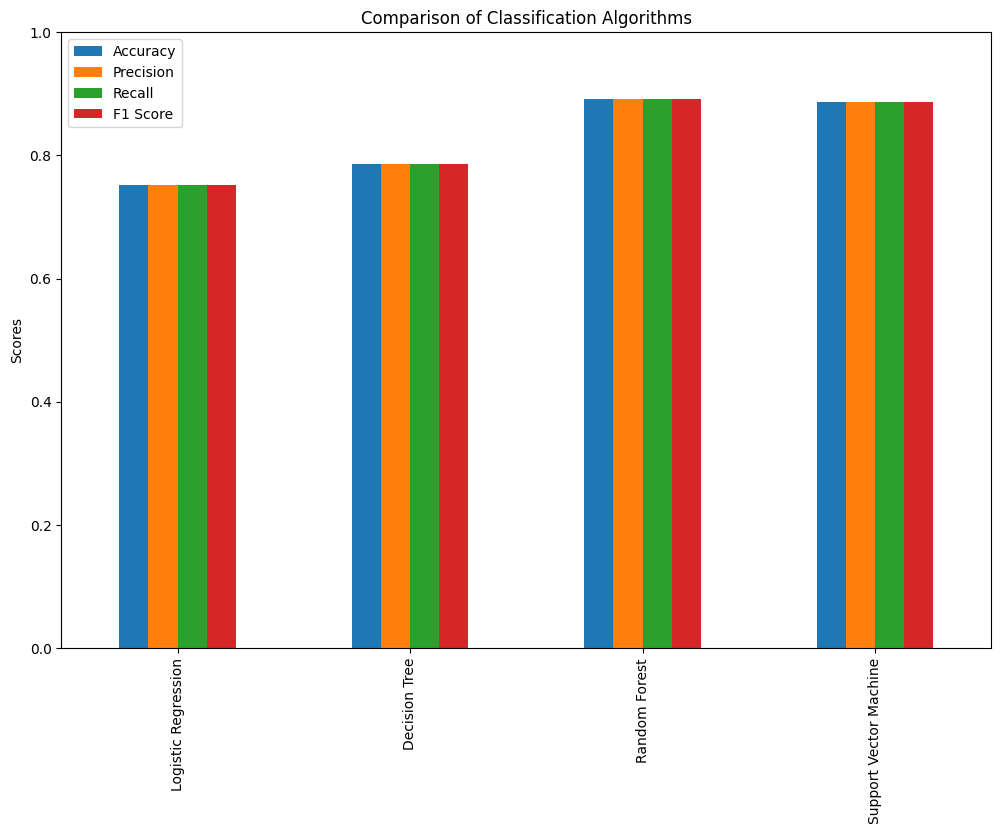

In [ ]:
results_df.plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of Classification Algorithms')
plt.ylabel('Scores')
plt.ylim(0, 1)
plt.show()

In [ ]:
best_model_name = results_df['F1 Score'].idxmax()
best_model = classifiers[best_model_name]

In [ ]:
best_model.fit(X_train, y_train)
predictions = best_model.predict(X_test)

In [ ]:
prediction_labels = np.where(predictions == 1, 'good', 'bad')
print("Sample Predictions:")
for i in range(10):
    print(f"Prediction: {prediction_labels[i]}, Actual: {'good' if y_test.iloc[i] == 1 else 'bad'}")

Sample Predictions:
Prediction: bad, Actual: bad
Prediction: bad, Actual: bad
Prediction: bad, Actual: bad
Prediction: bad, Actual: bad
Prediction: bad, Actual: bad
Prediction: bad, Actual: bad
Prediction: bad, Actual: bad
Prediction: bad, Actual: bad
Prediction: bad, Actual: bad
Prediction: bad, Actual: bad


In [ ]:
predictions_df = pd.DataFrame({'Prediction': prediction_labels})
predictions_df.to_csv('apple_quality_predictions.csv', index=False)

print("Predictions saved to apple_quality_predictions.csv")


Predictions saved to apple_quality_predictions.csv
